# <font color=green>OSA case study</font>
## <font color=dark>Applying simple Principal Component Analysis (PCA) <font>

* ### PRDL & MLLB courses ETSIT - UPM
---


<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Reading OSA Data: We are going to use EXTREME cases to have severe/healthy classes

*  ## OSA_extreme_male.xlsx

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19281 bytes


In [4]:
# Import pandas
import pandas as pd

# Read Excell with extreme male cases
file = 'OSA_extreme_male.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)



In [7]:

# Load a sheet into a DataFrame by name: df_OSA
df_OSA = xl.parse('Sheet1')

In [8]:
df_OSA.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906


# **Select Data** ("UNSUPERVISED") so : NO IAH nor OSA

In [10]:
df = df_OSA[['Weight','Height','Age','Cervical','BMI']]


In [11]:
df.head(5)

,Weight,Height,Age,Cervical,BMI
0,80,173,32,40,26.729927
1,109,190,32,42,30.193906
2,86,169,39,42,30.110991
3,145,172,47,44,49.012980
4,90,180,36,40,27.777778


* ## **Performing PCA**

In [12]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

### LET's try with the same number of components than features
### KNOW what defines the limit
n_components = 5

pca = PCA(n_components = n_components)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<font color=red size=5>NOTE:</font>
- ### Display some PCA components
- ### Do you see something strange?

In [19]:
## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
PC1 = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = pca.components_[1]

<BarContainer object of 5 artists>

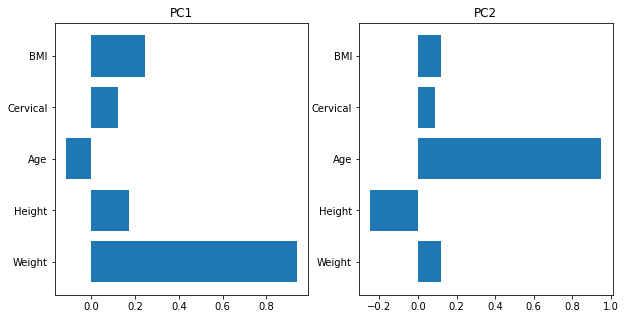

In [29]:
features = df.columns
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features,PC2)

<font color=red size=5>Remember the importance of Scaling before PCA!!!:</font>


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

X_scaled = scaler.transform(df)

pca.fit(X_scaled)

# 0,1 denote PC1 and PC2; change values for other PCs
PC1 = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = pca.components_[1]

In [36]:
import numpy as np

# Verify normalization:

# Zero mean
print('Features means after normalization \n',
     list(np.mean(X_scaled,axis=0)))

print('\nStandard deviation after normalization \n',
     list(np.std(X_scaled,axis=0)))


Features means after normalization 
 [4.792329602698517e-17, -1.0351431941828798e-15, 1.7252386569714664e-16, -9.712454661468996e-16, -1.0079866597675882e-15]

Standard deviation after normalization 
 [1.0, 1.0, 1.0, 1.0, 1.0]


* #### Plot after scaling

<BarContainer object of 5 artists>

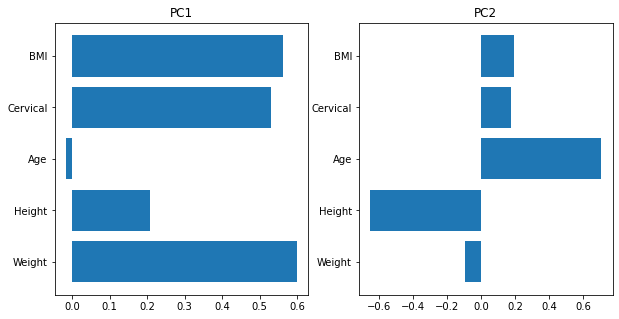

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features,PC2)

* ### Cumulative explained variance
        How many dimensions to keep? 

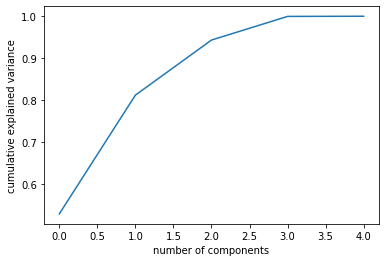

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* ### Project data

Text(0, 0.5, 'Second Principal Component')

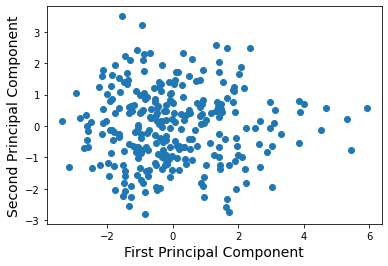

In [40]:
## project data into PC space

Z1 = pca.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
Z2 = pca.transform(X_scaled)[:,1]

plt.scatter(Z1,Z2)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)



# Adding SUPERVISED information: plot in different colors Severe and Healthy

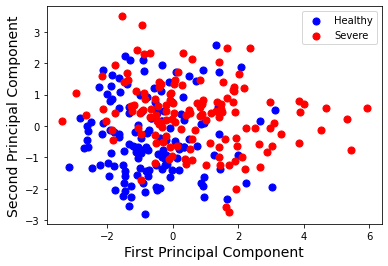

In [53]:
group = df_OSA['OSA']
cdict = {'Severe': 'red', 'Healthy': 'blue'}


fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], c = cdict[g], label = g, s = 50)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.legend()


<font color=red size=4>Understand biplot representation</font>

In [55]:
# This is to plot as a vector the effect
# for every original factor (or variable)
# into the PC1 PC2 space
# Biplot

coeff = np.transpose(pca.components_[0:2, :])

print(coeff)
print(features)

[[ 0.59896837 -0.0933276 ]
 [ 0.20821546 -0.65172377]
 [-0.01592519  0.70546199]
 [ 0.53167123  0.17659296]
 [ 0.56120879  0.19412467]]
Index(['Weight', 'Height', 'Age', 'Cervical', 'BMI'], dtype='object')


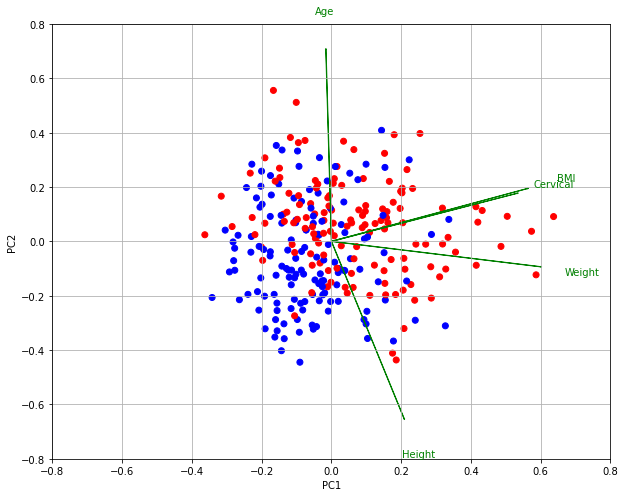

In [78]:
x_new = pca.transform(X_scaled)

color= ['red' if l == 'Severe' else 'blue' for l in df_OSA['OSA']]

def myplot(score,coeff,n_var,labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)
    
    plot_scale = 1.2
    
    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'g',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, features[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.8,0.8)
    plt.ylim(-0.8,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,8))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),5)
plt.show()

<font color=   #FF5733   face="times, serif" size=5>=========================================<br>Dimensionality reduction using<br> **t-Distributed Stochastic Neighbouring Entities (t-SNE)**

<font color= #792c35 face="times, bold" size=4>t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

<font color= #eb0a3a size=4>How to Use t-SNE Effectively:</font>

### Although extremely useful for visualizing high-dimensional data, t-SNE plots can sometimes be mysterious or misleading. By exploring how it behaves in simple cases, we can learn to use it more effectively.
See https://distill.pub/2016/misread-tsne/

In [80]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

OSA_tsne = TSNE(random_state=123).fit_transform(X_scaled)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.3394346237182617 seconds


In [81]:
OSA_tsne.shape

(278, 2)

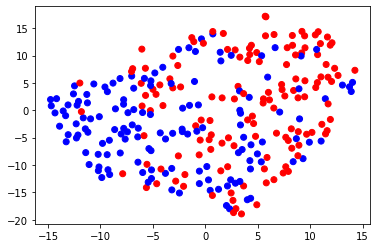

In [82]:
plt.scatter(OSA_tsne[:,0] ,OSA_tsne[:,1], c = color)

## See: http://projector.tensorflow.org/ ![imagen.png](attachment:imagen.png)